In [1]:
import pandas as pd

In [109]:
import seaborn as sns
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
%matplotlib inline
import random
import statsmodels.api as sm
from __future__ import print_function

In [3]:
df=pd.read_html('https://www.basketball-reference.com/leagues/NBA_2022_totals.html#totals_stats')

In [4]:
df=pd.DataFrame(df[0])

In [5]:
df1=pd.read_html('https://hoopshype.com/salaries/players/2021-2022/')

In [6]:
df1=pd.DataFrame(df1[0])

In [7]:
df1=df1[['Player', '2021/22']]

In [8]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,...,.595,146,327,473,82,37,41,84,151,664
1,2,Steven Adams,C,28,MEM,76,75,1999,210,384,...,.543,349,411,760,256,65,60,115,153,528
2,3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,...,.753,137,427,564,190,80,44,148,171,1068
3,4,Santi Aldama,PF,21,MEM,32,0,360,53,132,...,.625,33,54,87,21,6,10,16,36,132
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,...,.873,73,185,258,42,14,47,44,78,607


In [9]:
df1.head()

,Player,2021/22
0,Stephen Curry,"$45,780,966"
1,John Wall,"$44,310,840"
2,James Harden,"$44,310,840"
3,Russell Westbrook,"$44,211,146"
4,Kevin Durant,"$42,018,900"


In [10]:
df.shape

(842, 30)

In [11]:
df1.shape

(653, 2)

In [12]:
df3=pd.merge(df,df1,how='left',on='Player')

In [13]:
df3.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021/22
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,...,146,327,473,82,37,41,84,151,664,"$2,711,280"
1,2,Steven Adams,C,28,MEM,76,75,1999,210,384,...,349,411,760,256,65,60,115,153,528,"$17,073,171"
2,3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,...,137,427,564,190,80,44,148,171,1068,"$28,103,500"
3,4,Santi Aldama,PF,21,MEM,32,0,360,53,132,...,33,54,87,21,6,10,16,36,132,NaN
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,...,73,185,258,42,14,47,44,78,607,"$2,641,691"


In [14]:
df3['2021/22']=df3['2021/22'].str.replace('$', '')

C:\Users\k__bo\AppData\Local\Temp\ipykernel_15456\2689507911.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['2021/22']=df3['2021/22'].str.replace('$', '')


In [15]:
df3['2021/22']=df3['2021/22'].str.replace(',', '')

In [16]:
df3.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021/22
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,...,146,327,473,82,37,41,84,151,664,2711280
1,2,Steven Adams,C,28,MEM,76,75,1999,210,384,...,349,411,760,256,65,60,115,153,528,17073171
2,3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,...,137,427,564,190,80,44,148,171,1068,28103500
3,4,Santi Aldama,PF,21,MEM,32,0,360,53,132,...,33,54,87,21,6,10,16,36,132,NaN
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,...,73,185,258,42,14,47,44,78,607,2641691


In [17]:
df3['2021/22']=df3['2021/22'].astype(float)

In [18]:
print(df3.dtypes)

Rk          object
Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
2021/22    float64
dtype: object


In [86]:
df3.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021/22
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,...,146,327,473,82,37,41,84,151,664,2711280.0
1,2,Steven Adams,C,28,MEM,76,75,1999,210,384,...,349,411,760,256,65,60,115,153,528,17073171.0
2,3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,...,137,427,564,190,80,44,148,171,1068,28103500.0
3,4,Santi Aldama,PF,21,MEM,32,0,360,53,132,...,33,54,87,21,6,10,16,36,132,NaN
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,...,73,185,258,42,14,47,44,78,607,2641691.0


In [20]:
df3.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       '2021/22'],
      dtype='object')

In [21]:
model_dat=df3[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       '2021/22']]

In [22]:
model_dat.dropna(inplace=True)

C:\Users\k__bo\AppData\Local\Temp\ipykernel_15456\3612881861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_dat.dropna(inplace=True)


In [23]:
X=model_dat.drop(['2021/22'], axis=1)
y=model_dat['2021/22']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
# Create the linear regression object
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the model coefficients

print(model.coef_)
print(model.intercept_)

[ 7.31827309e+05 -1.00714227e+05  6.06098773e+04 -3.24206647e+03
  7.67046458e+03  1.13186863e+04  1.45021960e+07 -5.37294758e+03
  1.85976609e+04  8.96642213e+05  1.30434122e+04 -7.27897470e+03
 -1.62363325e+06 -5.07266929e+06 -1.96199547e+04  5.13475564e+04
  1.31664538e+06 -1.32375384e+04  1.40728231e+04  8.35284750e+02
  1.33026695e+04  1.82488437e+04  4.86547794e+04  3.91617404e+03
 -3.22692628e+04 -9.65197314e+03]
-18525570.29166985


In [113]:
model_dat['Age'] = model_dat['Age'].astype(float)
model_dat['G'] = model_dat['G'].astype(float)
model_dat['GS'] = model_dat['GS'].astype(float)
model_dat['MP'] = model_dat['MP'].astype(float)
model_dat['FG'] = model_dat['FG'].astype(float)
model_dat['FGA'] = model_dat['FGA'].astype(float)
model_dat['FG%'] = model_dat['FG%'].astype(float)
model_dat['3P'] = model_dat['3P'].astype(float)
model_dat['3PA'] = model_dat['3PA'].astype(float)
model_dat['3P%'] = model_dat['3P%'].astype(float)
model_dat['eFG%'] = model_dat['eFG%'].astype(float)
model_dat['FT'] = model_dat['FT'].astype(float)
model_dat['FTA'] = model_dat['FTA'].astype(float)
model_dat['FT%'] = model_dat['FT%'].astype(float)
model_dat['TRB'] = model_dat['TRB'].astype(float)
model_dat['AST'] = model_dat['AST'].astype(float)
model_dat['STL'] = model_dat['STL'].astype(float)
model_dat['BLK'] = model_dat['BLK'].astype(float)
model_dat['PTS'] = model_dat['PTS'].astype(float)

C:\Users\k__bo\AppData\Local\Temp\ipykernel_15456\2950290086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_dat['Age'] = model_dat['Age'].astype(float)
C:\Users\k__bo\AppData\Local\Temp\ipykernel_15456\2950290086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_dat['G'] = model_dat['G'].astype(float)
C:\Users\k__bo\AppData\Local\Temp\ipykernel_15456\2950290086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [114]:
print(model_dat.dtypes)

Age        float64
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P          object
2PA         object
2P%         object
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB         object
DRB         object
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV         object
PF          object
PTS        float64
2021/22    float64
dtype: object


In [116]:
model_dat['fitted'] = fitted

C:\Users\k__bo\AppData\Local\Temp\ipykernel_15456\173239779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_dat['fitted'] = fitted


In [140]:
x1 = model_dat[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS', '2021/22']]
y = model_dat['fitted']

In [137]:
x = sm.add_constant(x1)

In [138]:
results = sm.OLS(y,x).fit()

In [139]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fitted   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2445.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        23:30:45   Log-Likelihood:                -8661.0
No. Observations:                 575   AIC:                         1.736e+04
Df Residuals:                     557   BIC:                         1.744e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.775e+07   3.96e+05    -44.797      0.000   -1.85e+07    -1.7e+07
Age         7.129e+05      1e+04     71.141      0.000    6.93e+05    7.33e+05
G          -1.319e+05   4409.102    -29.913      0.000   -1.41e+05   -1.23e+05
GS          4.798e+04   3589.322     13.369      0.000    4.09e+04     5.5e+04
MP         -3865.4748    298.754    -12.939      0.000   -4452.298   -3278.652
FG          9542.2768   2703.985      3.529      0.000    4231.022    1.49e+04
FGA         6478.4967   1480.310      4.376      0.000    3570.825    9386.169
FG%         6.648e+06   5.15e+05     12.913      0.000    5.64e+06    7.66e+06
3P          -1.16e+04   5646.091     -2.055      0.040   -2.27e+04    -512.367
3PA         2.136e+04   2624.526      8.137      0.000    1.62e+04    2.65e+04
FT          -1.29e+04   3922.349     -3.288      0.001   -2.06e+04   -5190.782
FTA         4.311e+04   3740.326     11.525      0.000    3.58e+04    5.05e+04
FT%         1.288e+06   2.77e+05      4.644      0.000    7.43e+05    1.83e+06
TRB         6412.4779    619.176     10.356      0.000    5196.272    7628.684
AST         1.534e+04    668.499     22.945      0.000     1.4e+04    1.67e+04
STL         1.247e+04   2977.304      4.187      0.000    6617.763    1.83e+04
BLK          3.57e+04   3086.315     11.566      0.000    2.96e+04    4.18e+04
PTS        -5413.2337   1009.122     -5.364      0.000   -7395.383   -3431.084
2021/22        0.0213      0.006      3.479      0.001       0.009       0.033
==============================================================================
Omnibus:                       50.437   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.630
Skew:                           0.138   Prob(JB):                     1.69e-54
Kurtosis:                       6.203   Cond. No.                     1.38e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.17e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
model_dat.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021/22
0,22,73,28,1725,265,603,.439,56,156,.359,...,146,327,473,82,37,41,84,151,664,2711280.0
1,28,76,75,1999,210,384,.547,0,1,.000,...,349,411,760,256,65,60,115,153,528,17073171.0
2,24,56,56,1825,406,729,.557,0,6,.000,...,137,427,564,190,80,44,148,171,1068,28103500.0
4,36,47,12,1050,252,458,.550,14,46,.304,...,73,185,258,42,14,47,44,78,607,2641691.0
5,23,65,21,1466,253,680,.372,105,338,.311,...,37,150,187,156,46,23,93,103,692,3261480.0


In [26]:
fitted=model.predict(X)

In [27]:
dif=fitted-y

In [28]:
dif.index

Int64Index([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,
            ...
            826, 828, 830, 832, 835, 836, 837, 838, 839, 840],
           dtype='int64', length=575)

In [29]:
df4=df3.filter(items = dif.index, axis=0)

In [30]:
df4['dif']=dif

In [31]:
df5=df4[['Player','dif']].sort_values('dif')

In [32]:
df5

,Player,dif
294,James Harden,-2.614405e+07
750,Klay Thompson,-2.329445e+07
282,Blake Griffin,-2.301840e+07
784,Kemba Walker,-2.182122e+07
369,Kyrie Irving,-2.018507e+07
...,...,...
60,Saddiq Bey,1.370852e+07
545,Ja Morant,1.436944e+07
81,Miles Bridges,1.675800e+07
263,Shai Gilgeous-Alexander,1.721933e+07


In [33]:
sns.set()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'James Harden'),
  Text(1, 0, 'Klay Thompson'),
  Text(2, 0, 'Blake Griffin'),
  Text(3, 0, 'Kemba Walker'),
  Text(4, 0, 'Kyrie Irving'),
  Text(5, 0, 'Damian Lillard'),
  Text(6, 0, 'Paul George'),
  Text(7, 0, 'Tobias Harris'),
  Text(8, 0, 'Bradley Beal'),
  Text(9, 0, 'CJ McCollum')])

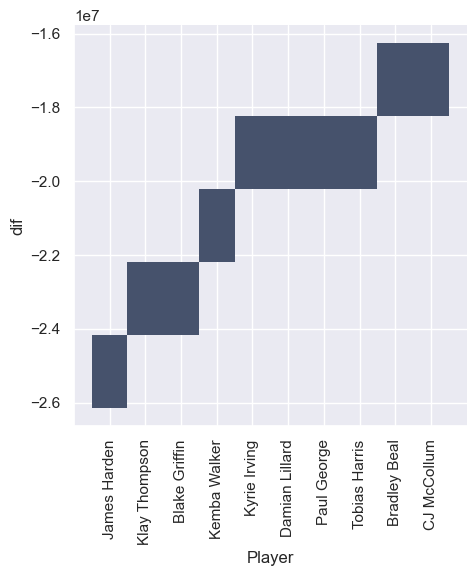

In [50]:
sns.displot(data = df5.iloc[:10], x = 'Player', y = 'dif')
plt.xticks(rotation=90)

In [35]:
df5['dif'].nlargest(n=5)

838    2.461454e+07
263    1.721933e+07
81     1.675800e+07
545    1.436944e+07
60     1.370852e+07
Name: dif, dtype: float64

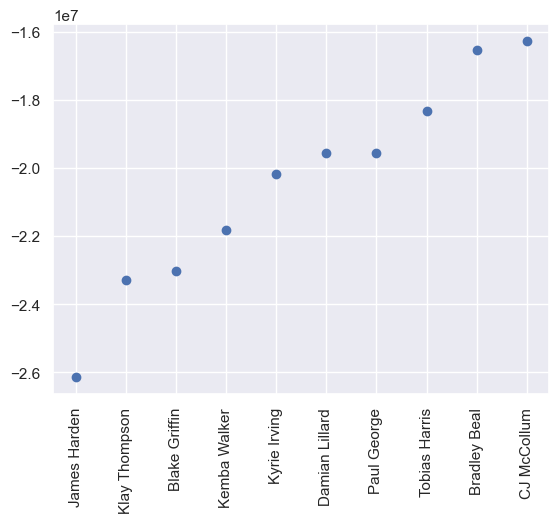

In [55]:
plt.scatter(data = df5.iloc[:10], x = 'Player', y = 'dif')
plt.xticks(rotation=90)
plt.show()

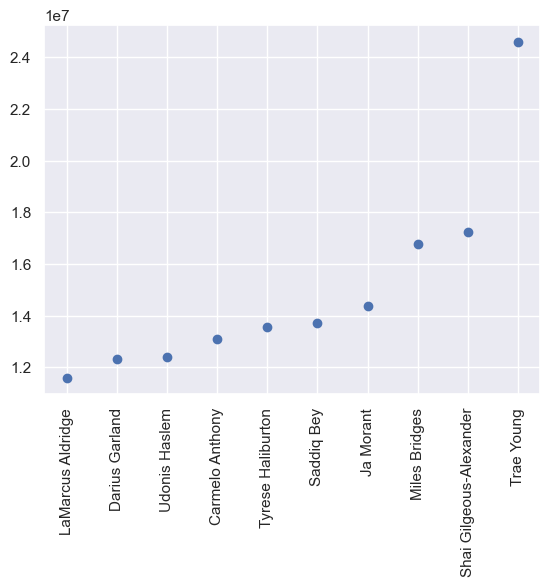

In [57]:
plt.scatter(data = df5.iloc[-10:], x = 'Player', y = 'dif')
plt.xticks(rotation=90)
plt.show()

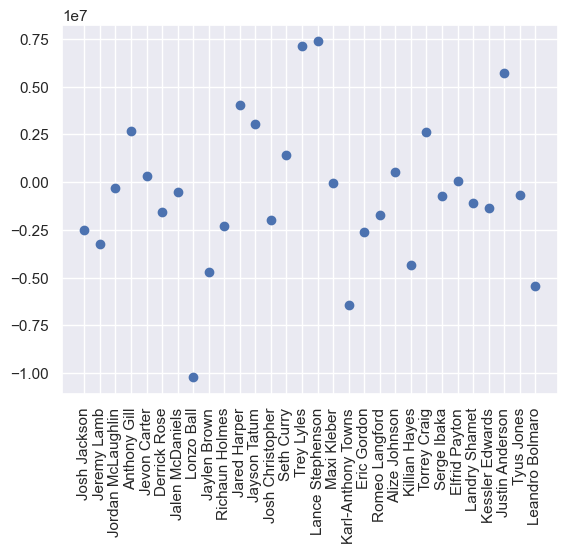

In [60]:
plt.scatter(data=df5.sample(n=30, random_state=42), x='Player', y='dif')
plt.xticks(rotation=90)
plt.show()

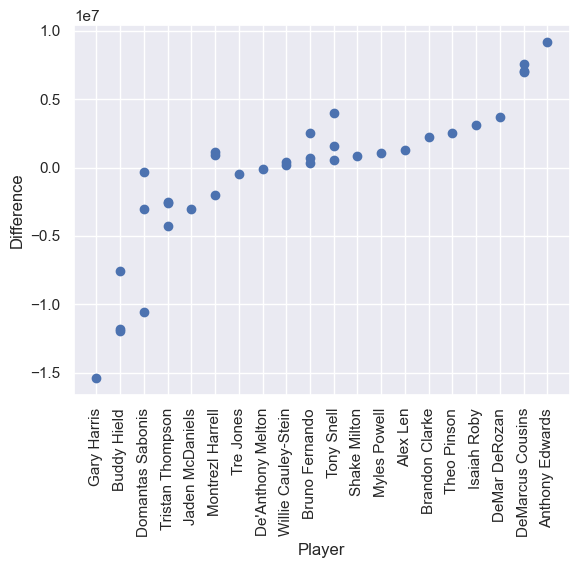

In [64]:
# randomly select 20 players
random_players = random.sample(list(df5['Player']), 20)

# create a subset of the data frame with only the selected players
df5_subset = df5[df5['Player'].isin(random_players)]

# create a scatter plot of the 'dif' column vs. the 'Total' column for the selected players
plt.scatter(x=df5_subset['Player'], y=df5_subset['dif'])
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Difference')
plt.title('')
plt.show()

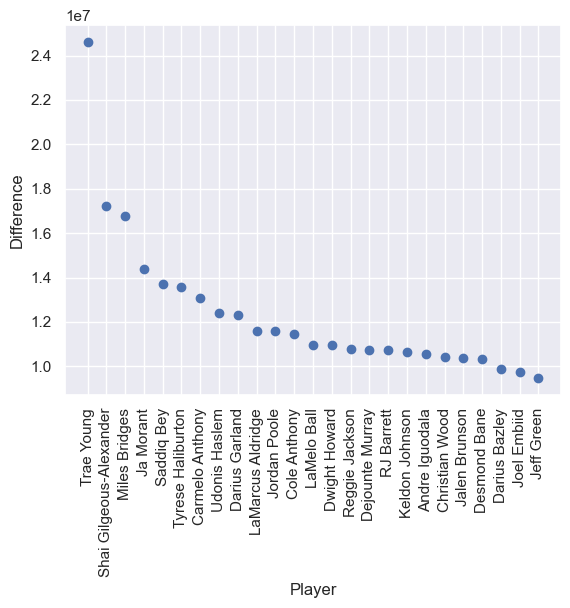

In [44]:
import matplotlib.pyplot as plt

# sort the data frame by the 'dif' column in descending order
df5_sorted = df5.sort_values('dif', ascending=False)

# select the top 10 players
top_25 = df5_sorted.head(25)

# create a scatter plot of the 'dif' column vs. the 'Total' column for the top 10 players
plt.scatter(x=top_25['Player'], y=top_25['dif'])
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Difference')
plt.title('')
plt.show()

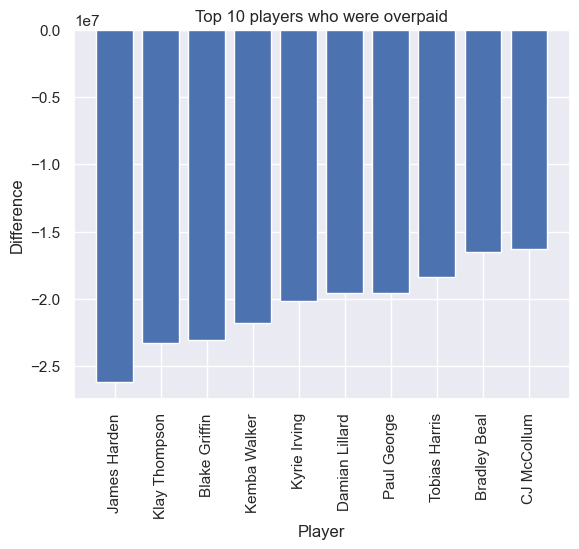

In [96]:
# sort the data frame by the 'dif' column in ascending order
df5_sorted = df5.sort_values('dif')

# create a bar chart of the bottom 10 'dif' values
bottom_10 = df5_sorted.head(10)
plt.bar(x=bottom_10['Player'], height=bottom_10['dif'])
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Difference')
plt.title('Top 10 players who were overpaid')
plt.show()

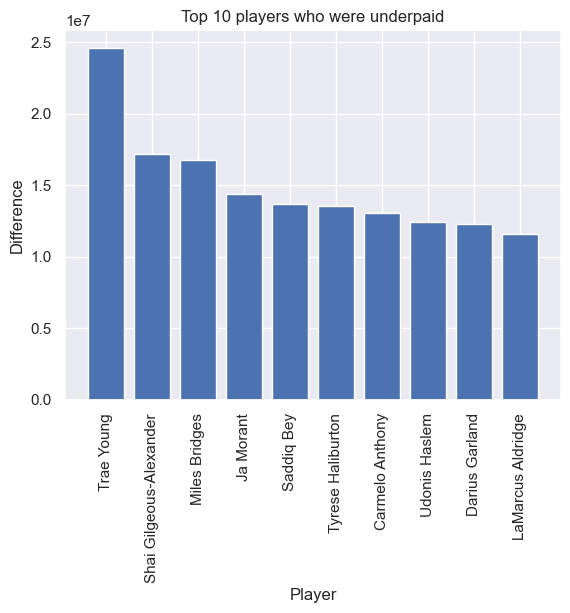

In [95]:
# sort the data frame by the 'dif' column in descending order
df5_sorted = df5.sort_values('dif', ascending=False)

# create a bar chart of the top 10 'dif' values
top_10 = df5_sorted.head(10)
plt.bar(x=top_10['Player'], height=top_10['dif'])
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Difference')
plt.title('Top 10 players who were underpaid')
plt.show()

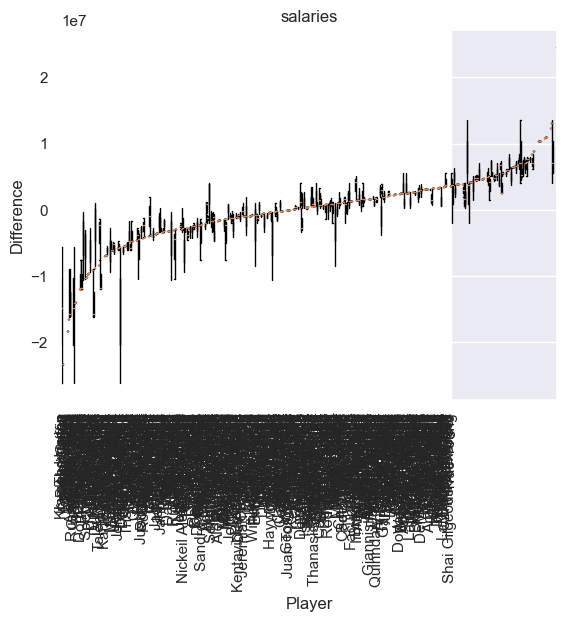

In [67]:
plt.boxplot(x=[df5[df5['Player'] == player]['dif'] for player in df5['Player']])
plt.xticks(ticks=range(1, len(df5['Player'].unique())+1), labels=df5['Player'].unique(), rotation=90)
plt.xlabel('Player')
plt.ylabel('Difference')
plt.title('salaries')
plt.show()

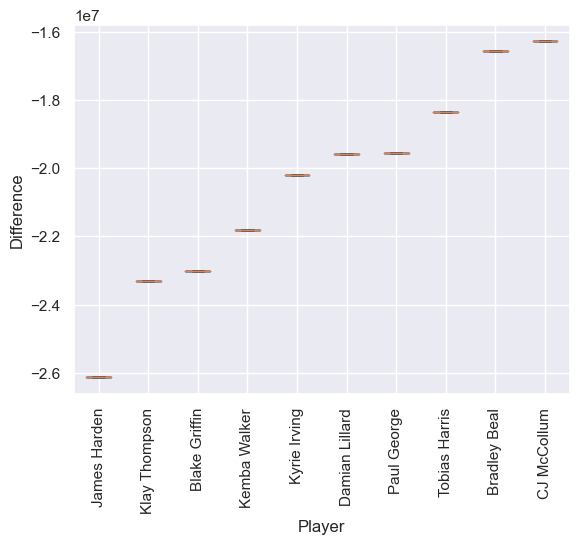

In [68]:
# sort the data frame by the 'dif' column in ascending order
df5_sorted = df5.sort_values('dif')

# create a box plot of the bottom 10 'dif' values
bottom_10 = df5_sorted.head(10)
plt.boxplot(x=[bottom_10[bottom_10['Player'] == player]['dif'] for player in bottom_10['Player']])
plt.xticks(ticks=range(1, len(bottom_10['Player'].unique())+1), labels=bottom_10['Player'].unique(), rotation=90)
plt.xlabel('Player')
plt.ylabel('Difference')
plt.title('')
plt.show()

In [94]:
df5.to_csv('data.csv', index=False)

In [70]:
df.to_csv('playerstats.csv', index=False)

In [71]:
df1.to_csv('playersalaries.csv', index=False)

In [89]:
model_dat.to_csv('playerstats-salaries.csv', index=False)